# Выявить определяющие успешность игры закономерности

## Описание проекта

    Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
    
    Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
    
## Данные

Датасеты представлены ввиде файлов с расширением csv (/datasets/games.csv).  

Путь к файлам:
* /datasets/games.csv

## Описание данных

* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

    Данные за 2016 год могут быть неполными.

# <a name="Back"></a> Задачи исследования

[**1. Открыть файлы с данными и изучить общую информацию**](#Explore)
- [Открыть файл](#Open)
- [Изучить общую информацию](#Study)

[**2. Подготовка данных**](#Preparation)
* [Заменить названия столбцов (привести к нижнему регистру)](#Lower)
* [Преобразовать данные в нужные типы](#Type)
* [Обработать пропуски при необходимости](#Skips)
* [Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец](#Count)

[**3. Анализ данных**](#Data_analysis)
* [Сколько игр выпускалось в разные годы.](#Many_games)
* [Как менялись продажи по платформам.](#Sales_platform)
* [Определить актуальный период.](#Current_period)
* [Как менялись продажи по платформам.](#Sales_changes)
* [Какие платформы лидируют по продажам, растут или падают?](#Describe_distributions)
* [Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.](#Boxplot)
* [Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.](#Impact_sales)
* [Соотнести выводы с продажами игр на других платформах](#Correlate_conclusions)
* [Общее распределение игр по жанрам.](#General_distribution)

[**4. Составить портрет пользователя каждого региона**](#Portrait)
* [Определить для пользователя каждого региона (NA, EU, JP):](#Region)
    * [Самые популярные платформы (топ-5)](#Popular_platforms)
    * [Самые популярные жанры (топ-5)](#Popular_genres)
    * [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#User_revenue)

[**5. Проверить гипотезы**](#Hypothesis)
* [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#Hypothesis1)
* [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные](#Hypothesis2)

[**6. Результаты**](#Results)
* [Вывод](#Conclusion)
* [Рекомендации](#Recommendations)

## <a name="Lower"></a> Открыть файлы с данными и изучить общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from scipy import stats as st
from datetime import datetime

In [2]:
# настройка отображения
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# обработка ошибок
warnings.filterwarnings('ignore')

### <a name="Open"></a> Открыть файл

In [3]:
games = pd.read_csv('/datasets/games.csv')
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7448,Champion Jockey: G1 Jockey & Gallop Racer,PS3,"2,011.00",Sports,0.06,0.05,0.08,0.02,nan,NaN,NaN
5381,DanceDanceRevolution,Wii,"2,010.00",Simulation,0.28,0.04,0.00,0.02,nan,tbd,E
658,Monopoly,PC,"1,994.00",Misc,1.49,0.81,0.00,0.10,nan,NaN,NaN
3052,Hidden Objects: Mystery Stories,DS,"2,009.00",Adventure,0.18,0.43,0.00,0.05,nan,NaN,NaN
3992,Super Famista 5,SNES,"1,996.00",Sports,0.00,0.00,0.50,0.00,nan,NaN,NaN
4383,Teenage Mutant Ninja Turtles 2: Battle Nexus,PS2,"2,004.00",Action,0.22,0.17,0.00,0.06,47.00,7.8,T
9120,Pro Evolution Soccer 2015,XOne,"2,014.00",Sports,0.03,0.10,0.00,0.01,79.00,7.3,E
9620,Little Battlers eXperience: Wars,3DS,"2,013.00",Strategy,0.00,0.00,0.13,0.00,nan,NaN,NaN
7502,Trade & Battle: Card Hero,GB,"2,000.00",Strategy,0.00,0.00,0.20,0.00,nan,NaN,NaN
10362,Sakura Wars,DC,"2,000.00",Adventure,0.00,0.00,0.11,0.00,nan,NaN,NaN


### <a name="Study"></a> Изучить общую информацию

In [4]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,"16,446.00","2,006.48",5.88,"1,980.00","2,003.00","2,007.00","2,010.00","2,016.00"
NA_sales,"16,715.00",0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,"16,715.00",0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,"16,715.00",0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,"16,715.00",0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,"8,137.00",68.97,13.94,13.00,60.00,71.00,79.00,98.00


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


[К оглавлению](#Back)

In [6]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# функция вывоодит все столбцы с NaN
def view_null(data):
    for column in list(data.columns):
        if not data[data[column].isnull()].empty:
            if data[data[column].isnull()].shape[0] > 10:
                print('\n', '-'*100)
                print(column)
                display(data[data[column].isnull()].sample(10))
            else:
                print('\n', '-'*100)
                print(column)
                display(data[data[column].isnull()].sample(data[data[column].isnull()].shape[0]))

view_null(games)


 ----------------------------------------------------------------------------------------------------
Name


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN



 ----------------------------------------------------------------------------------------------------
Year_of_Release


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4818,LEGO Harry Potter: Years 5-7,3DS,nan,Action,0.18,0.19,0.00,0.03,71.00,6.5,E10+
9293,Disney's Cinderella: Magical Dreams,GBA,nan,Platform,0.10,0.04,0.00,0.00,69.00,tbd,E
2010,Donkey Kong Land III,GB,nan,Platform,0.68,0.31,0.00,0.04,nan,NaN,NaN
12734,Mobile Ops: The One Year War,X360,nan,Simulation,0.00,0.00,0.06,0.00,nan,NaN,NaN
11119,Super Puzzle Fighter II,GBA,nan,Puzzle,0.06,0.02,0.00,0.00,83.00,9.5,E
15119,Legacy of Ys: Books I & II,DS,nan,Role-Playing,0.02,0.00,0.00,0.00,nan,NaN,NaN
4635,NHL Slapshot,Wii,nan,Sports,0.39,0.00,0.00,0.02,76.00,8.1,E
2157,Wheel of Fortune,PS2,nan,Misc,0.47,0.36,0.00,0.12,nan,tbd,E
3289,Advance Wars: Days of Ruin,DS,nan,Strategy,0.43,0.12,0.00,0.05,86.00,8.7,E10+
12959,Mountain Bike Adrenaline,PS2,nan,Sports,0.03,0.02,0.00,0.01,nan,tbd,E



 ----------------------------------------------------------------------------------------------------
Genre


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN



 ----------------------------------------------------------------------------------------------------
Critic_Score


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16108,Nobunaga no Yabou DS,DS,"2,006.00",Strategy,0.00,0.00,0.01,0.00,nan,NaN,NaN
5683,Quiz Magic Academy DS,DS,"2,008.00",Misc,0.00,0.00,0.32,0.00,nan,NaN,NaN
6575,The Penguins of Madagascar,DS,"2,010.00",Action,0.12,0.11,0.00,0.02,nan,tbd,E
14606,Medabots Girls Mission: Metabee Ver. / Rokusho...,3DS,"2,016.00",Role-Playing,0.00,0.00,0.03,0.00,nan,NaN,NaN
9172,The Bombing Islands,PS,"1,997.00",Platform,0.08,0.05,0.00,0.01,nan,NaN,NaN
7057,Rock Band Track Pack Volume 1,Wii,"2,008.00",Misc,0.17,0.04,0.00,0.02,nan,NaN,NaN
10978,Agassi Tennis Generation,PS2,"2,003.00",Sports,0.04,0.03,0.00,0.01,nan,6,E
115,Crash Bandicoot,PS,"1,996.00",Platform,3.23,2.35,0.94,0.30,nan,NaN,NaN
6509,Yakuza: Ishin,PS3,"2,014.00",Action,0.00,0.00,0.26,0.00,nan,NaN,NaN
11286,Famicom Mini: Famicom Mukashi Banashi - Shin O...,GBA,"2,004.00",Adventure,0.00,0.00,0.08,0.00,nan,NaN,NaN



 ----------------------------------------------------------------------------------------------------
User_Score


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11015,Sonic Boom: Fire & Ice,3DS,"2,016.00",Platform,0.05,0.03,0.00,0.01,nan,NaN,NaN
5712,Digimon World: Dawn / Dusk,DS,"2,007.00",Role-Playing,0.12,0.00,0.18,0.01,nan,NaN,NaN
9075,OutRun 2,XB,"2,004.00",Racing,0.11,0.03,0.00,0.01,nan,NaN,NaN
416,Gran Turismo (PSP),PSP,"2,009.00",Racing,0.50,1.58,0.31,0.87,nan,NaN,NaN
8649,FIFA Soccer 97,PS,"1,996.00",Sports,0.09,0.06,0.00,0.01,nan,NaN,NaN
7324,Magician's Quest: Town of Magic,3DS,"2,012.00",Simulation,0.00,0.00,0.21,0.00,nan,NaN,NaN
7068,Super R-Type,SNES,"1,991.00",Shooter,0.00,0.00,0.23,0.00,nan,NaN,NaN
16589,Bomberman,Wii,"2,008.00",Puzzle,0.00,0.00,0.01,0.00,nan,NaN,NaN
13762,Dead Ball Zone,PS,"1,998.00",Sports,0.02,0.02,0.00,0.00,nan,NaN,NaN
15155,Nanatsuiro * Drops Pure!!,PS2,"2,007.00",Adventure,0.00,0.00,0.02,0.00,nan,NaN,NaN



 ----------------------------------------------------------------------------------------------------
Rating


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13638,Ore no Imouto ga Konna ni Kawaii Wake ga Nai H...,PS3,"2,013.00",Simulation,0.00,0.00,0.04,0.00,nan,NaN,NaN
11259,Wing Commander IV: The Price of Freedom,PS,"1,997.00",Simulation,0.05,0.03,0.00,0.01,nan,NaN,NaN
7247,Kidz Bop Dance Party! The Video Game,Wii,"2,010.00",Misc,0.20,0.00,0.00,0.01,nan,NaN,NaN
3794,LEGO Dimensions,X360,"2,015.00",Action,0.26,0.23,0.00,0.04,nan,6.1,NaN
6272,Burstrick: Wake Boarding!!,PS,"2,000.00",Sports,0.15,0.10,0.00,0.02,nan,NaN,NaN
14215,SX Superstar,GC,"2,003.00",Racing,0.03,0.01,0.00,0.00,nan,NaN,NaN
7290,Digimon World Re:Digitize,PSP,"2,012.00",Action,0.00,0.00,0.22,0.00,nan,NaN,NaN
6950,Street Fighter EX2 Plus,PS,"1,998.00",Fighting,0.13,0.09,0.00,0.02,nan,NaN,NaN
10630,Earth Defense Force 2025.1: The Shadow of New ...,PS4,"2,015.00",Action,0.00,0.00,0.10,0.00,nan,NaN,NaN
16656,Imagine Figure Skater (JP sales),DS,"2,007.00",Sports,0.00,0.00,0.01,0.00,nan,NaN,NaN


In [8]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Вывод

1. Необходимо преобразовать типы данных
2. Есть пропуски в колонках Critic_Score, User_Score, Rating, name,year_of_release, critic_score, user_score 
3. Пустые строки в колонке name можно удалить так, как неизвестно, что за игра, какого жанра.
4. Неизвестный год релиза оставляем, как есть так, как дата не была назначена, либо разработка еще ведется или наоборот прекратилась
5. В колонке платформа, есть непонятная платформа 2600, судя повсему это Atari 2600, необходимо переименовать.

## <a name="Preparation"></a> Подготовка данных

### <a name="Lower"></a> Заменить названия столбцов (привести к нижнему регистру)

In [9]:
games.columns = games.columns.str.lower()

# заменяем 2600 на Atari 2600
games.loc[games['platform'] == '2600', 'platform'] = 'Atari 2600'

### <a name="Type"></a> Преобразовать данные в нужные типы

In [10]:
display(games.info())

# заполняем пропуски
games['year_of_release'] = games['year_of_release'].fillna(1900)
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games['rating'] = games['rating'].fillna('Неизвестен')
games['name'] = games['name'].fillna('Неизвестно')
games['genre'] = games['genre'].fillna('Неизвестен')

# меняем тип данных в колонке year_of_release
games['year_of_release'] = games['year_of_release'].astype('int')
display(games['year_of_release'])
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null object
rating             16715 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


None

### <a name="Skips"></a> Обработать пропуски при необходимости

In [11]:
# проверяем какие есть уникальные значения в колонках critic_score и user_score
display(games['critic_score'].unique())
display(games['user_score'].unique())

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
# меняем тип данных в колонках critic_score и user_score
games['critic_score'] = games['critic_score'].astype('float')
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1
games['user_score'] = games['user_score'].astype('float')

In [13]:
games.duplicated().sum()

0

In [14]:
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


None

### <a name="Count"></a> Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

In [15]:
# функция считает суммарные продажи
def total_sales(data):
    total = 0
    for column in list(data):
        if 'sales' in column:
            total += data[column]
    return total

games['total_sales'] = total_sales(games)
display(games.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11268,50 Cent: Bulletproof,PSP,2006,Action,0.08,0.00,0.00,0.01,-1.00,-1.00,Неизвестен,0.09
5000,Battlefield 1,PC,2016,Shooter,0.11,0.24,0.00,0.03,88.00,7.60,M,0.38
3464,Xenosaga Episode II: Jenseits von Gut und Böse,PS2,2004,Role-Playing,0.28,0.22,0.00,0.07,-1.00,-1.00,Неизвестен,0.57
1083,Star Wars Battlefront: Renegade Squadron,PSP,2007,Shooter,0.90,0.46,0.00,0.32,73.00,7.90,T,1.68
7690,DS Kageyama Method: Dennou Hanpuku - Masu x Ma...,DS,2006,Misc,0.00,0.00,0.20,0.00,-1.00,-1.00,Неизвестен,0.20
8677,Kingdom Hearts: Birth by Sleep - Final Mix,PSP,2011,Role-Playing,0.00,0.00,0.16,0.00,-1.00,-1.00,Неизвестен,0.16
2319,LEGO The Lord of the Rings,Wii,2012,Action,0.48,0.34,0.00,0.07,-1.00,7.20,E10+,0.89
7846,Warhammer: Shadow of the Horned Rat,PS,1996,Strategy,0.11,0.07,0.00,0.01,-1.00,-1.00,Неизвестен,0.19
14384,Chicken Shoot 2,GBA,2005,Adventure,0.02,0.01,0.00,0.00,-1.00,-1.00,E10+,0.03
6870,Destiny: The Collection,PS4,2016,Shooter,0.05,0.15,0.00,0.04,-1.00,8.10,T,0.24


[К оглавлению](#Back)

## <a name="Data_analysis"></a> Анализ данных

### <a name="Many_games"></a> Сколько игр выпускалось в разные годы.

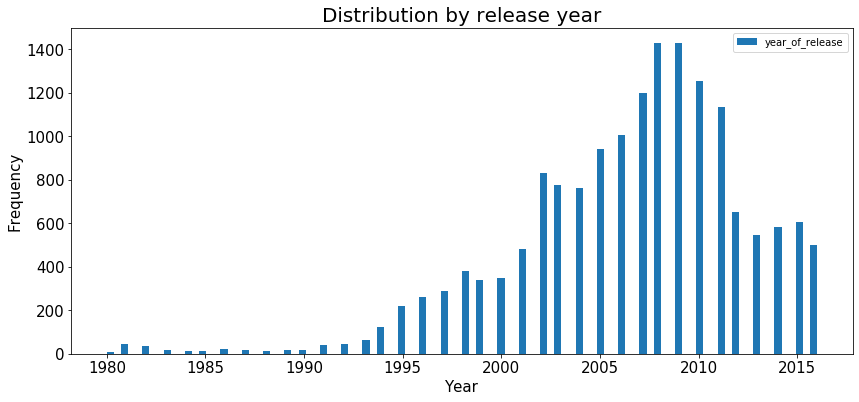

In [16]:
games[games['year_of_release'] != 1900]['year_of_release'].plot(title='Distribution by release year', fontsize=15, legend=True,\
                        kind='hist', bins=100, figsize=(14, 6)).title.set_size(20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

С 1980 по 1990 годы малое количество игр скорей всего обусловленно зарождением индустрии  
С 1995 года начался бурный рост, так же может быть связано с ростом технологий  
С 2010 начался спад, возможно связано скризисом 2008  
Период с 1980 по 1994 можно откинуть

### <a name="Sales_platform"></a> Как менялись продажи по платформам.

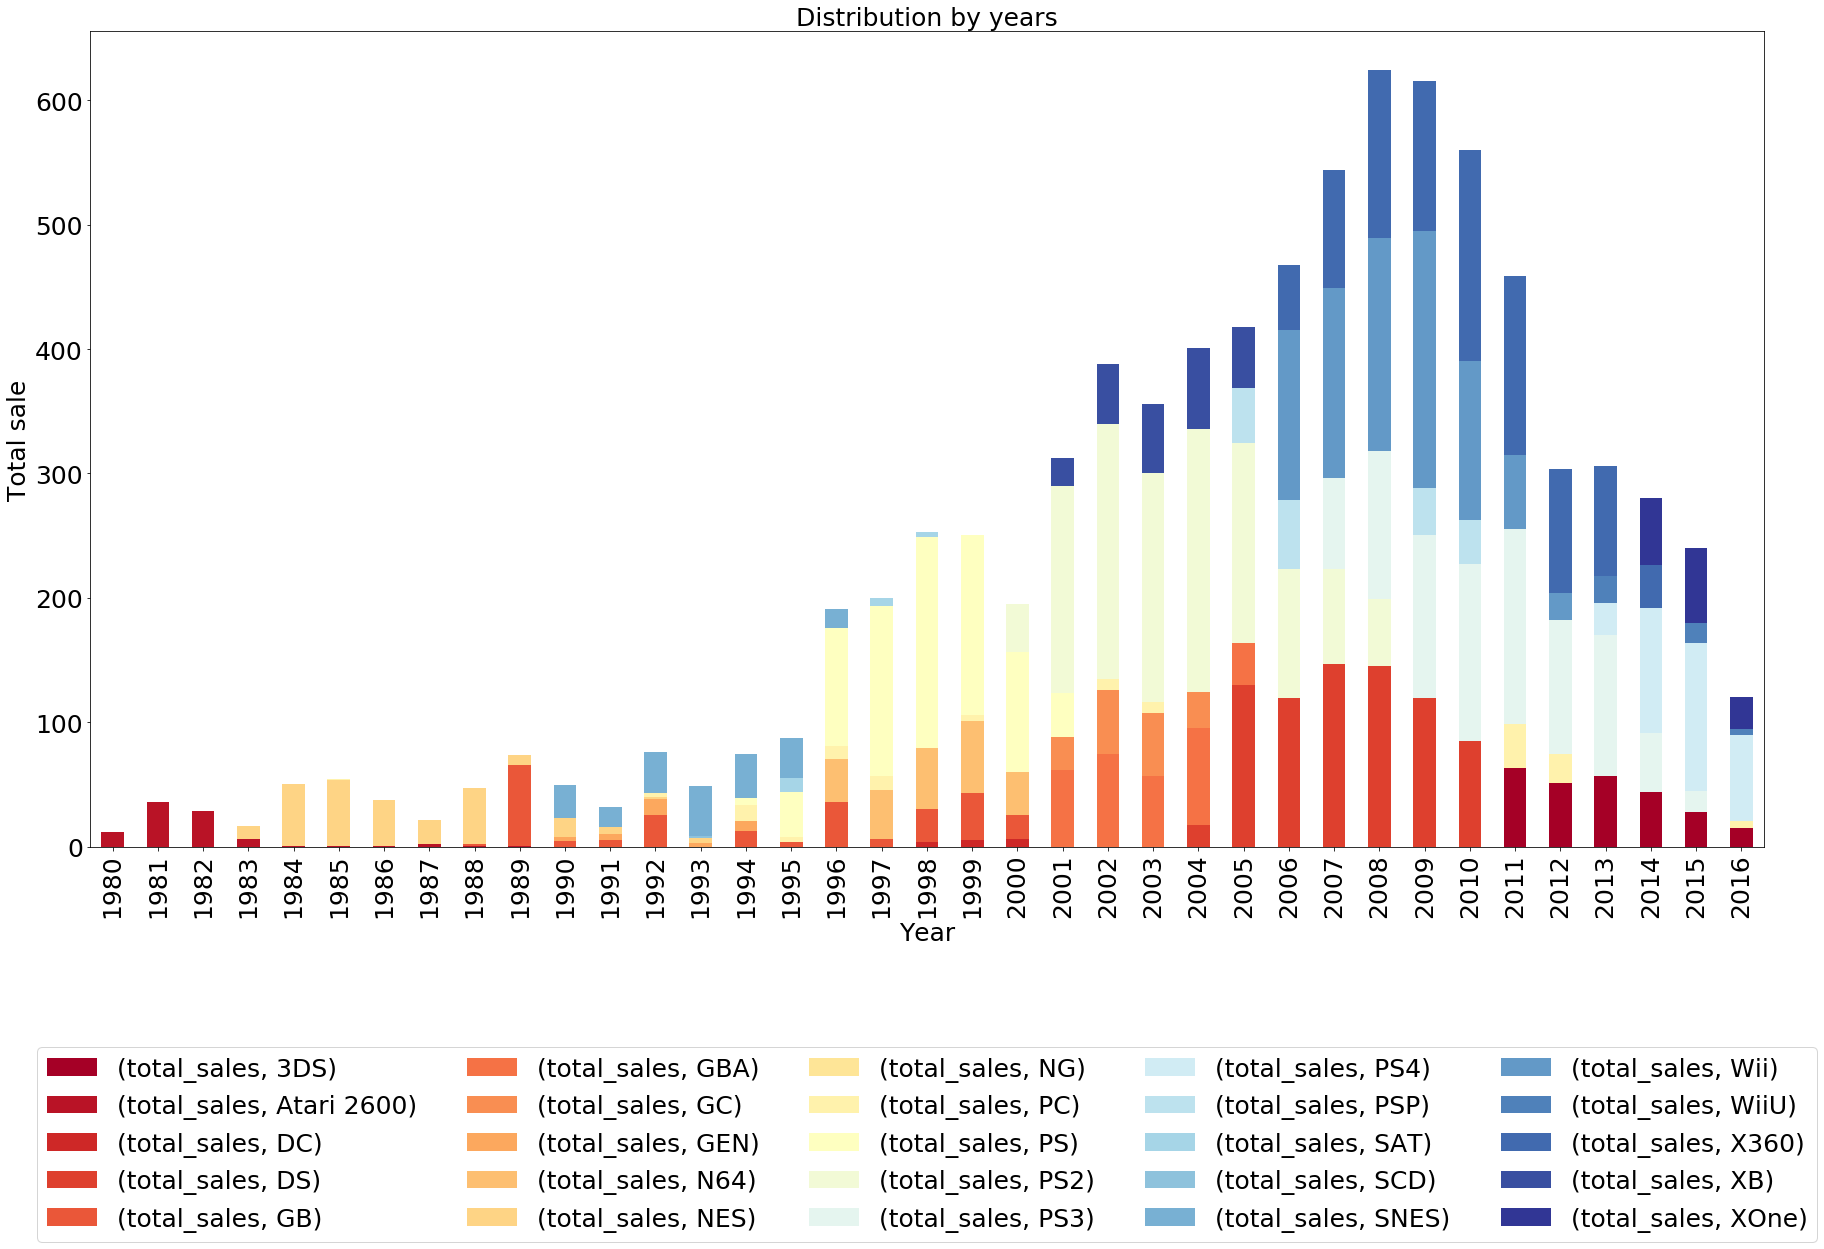

1980


,year_of_release,platform,total_sales
0,1980,Atari 2600,11.38


1981


,year_of_release,platform,total_sales
1,1981,Atari 2600,35.68


1982


,year_of_release,platform,total_sales
2,1982,Atari 2600,28.88


1983


,year_of_release,platform,total_sales
3,1983,NES,10.96
4,1983,Atari 2600,5.84


1984


,year_of_release,platform,total_sales
5,1984,NES,50.08
6,1984,Atari 2600,0.27


1985


,year_of_release,platform,total_sales
7,1985,NES,53.44
8,1985,Atari 2600,0.45
9,1985,PC,0.04
10,1985,DS,0.02


1986


,year_of_release,platform,total_sales
11,1986,NES,36.41
12,1986,Atari 2600,0.67


1987


,year_of_release,platform,total_sales
13,1987,NES,19.76
14,1987,Atari 2600,1.94


1988


,year_of_release,platform,total_sales
15,1988,NES,45.01
16,1988,GB,1.43
17,1988,Atari 2600,0.74
18,1988,PC,0.03


1989


,year_of_release,platform,total_sales
19,1989,GB,64.97
20,1989,NES,7.85
21,1989,Atari 2600,0.63


1990


,year_of_release,platform,total_sales
22,1990,SNES,26.15
23,1990,NES,15.73
24,1990,GB,4.89
25,1990,GEN,2.60


1991


,year_of_release,platform,total_sales
26,1991,SNES,16.22
27,1991,NES,6.11
28,1991,GB,5.57
29,1991,GEN,4.33


1992


,year_of_release,platform,total_sales
30,1992,SNES,32.98
31,1992,GB,25.49
32,1992,GEN,12.64
33,1992,PC,3.03
34,1992,NES,1.98


1993


,year_of_release,platform,total_sales
35,1993,SNES,40.02
36,1993,NES,3.61
37,1993,GEN,3.07
38,1993,SCD,1.50
39,1993,NG,0.21


1994


,year_of_release,platform,total_sales
40,1994,SNES,35.08
41,1994,PC,12.87
42,1994,GB,12.18
43,1994,GEN,8.13
44,1994,PS,6.03


1995


,year_of_release,platform,total_sales
45,1995,PS,35.96
46,1995,SNES,32.20
47,1995,SAT,11.57
48,1995,PC,4.22
49,1995,GB,3.60


1996


,year_of_release,platform,total_sales
50,1996,PS,94.70
51,1996,GB,36.03
52,1996,N64,34.10
53,1996,SNES,15.92
54,1996,PC,10.58


1997


,year_of_release,platform,total_sales
55,1997,PS,136.17
56,1997,N64,39.50
57,1997,PC,11.27
58,1997,SAT,6.77
59,1997,GB,6.37


1998


,year_of_release,platform,total_sales
60,1998,PS,169.49
61,1998,N64,49.24
62,1998,GB,26.90
63,1998,SAT,3.82
64,1998,DC,3.38


1999


,year_of_release,platform,total_sales
65,1999,PS,144.53
66,1999,N64,57.87
67,1999,GB,38.00
68,1999,DC,5.16
69,1999,PC,4.74


2000


,year_of_release,platform,total_sales
70,2000,PS,96.37
71,2000,PS2,39.17
72,2000,N64,33.97
73,2000,GB,19.76
74,2000,DC,5.99


2001


,year_of_release,platform,total_sales
75,2001,PS2,166.43
76,2001,GBA,61.53
77,2001,PS,35.59
78,2001,GC,26.34
79,2001,XB,22.26


2002


,year_of_release,platform,total_sales
80,2002,PS2,205.38
81,2002,GBA,74.16
82,2002,GC,51.81
83,2002,XB,48.01
84,2002,PC,8.57


2003


,year_of_release,platform,total_sales
85,2003,PS2,184.31
86,2003,GBA,56.67
87,2003,XB,55.04
88,2003,GC,50.61
89,2003,PC,8.84


2004


,year_of_release,platform,total_sales
90,2004,PS2,211.81
91,2004,GBA,77.91
92,2004,XB,65.42
93,2004,GC,28.82
94,2004,DS,17.27


2005


,year_of_release,platform,total_sales
95,2005,PS2,160.66
96,2005,DS,130.14
97,2005,XB,49.08
98,2005,PSP,43.84
99,2005,GBA,33.86


2006


,year_of_release,platform,total_sales
100,2006,Wii,137.15
101,2006,DS,119.81
102,2006,PS2,103.42
103,2006,PSP,55.32
104,2006,X360,51.62


2007


,year_of_release,platform,total_sales
105,2007,Wii,152.77
106,2007,DS,146.94
107,2007,X360,95.41
108,2007,PS2,75.99
109,2007,PS3,73.19


2008


,year_of_release,platform,total_sales
110,2008,Wii,171.32
111,2008,DS,145.31
112,2008,X360,135.26
113,2008,PS3,118.52
114,2008,PS2,53.90


2009


,year_of_release,platform,total_sales
115,2009,Wii,206.97
116,2009,PS3,130.93
117,2009,X360,120.29
118,2009,DS,119.54
119,2009,PSP,37.78


2010


,year_of_release,platform,total_sales
120,2010,X360,170.03
121,2010,PS3,142.17
122,2010,Wii,127.95
123,2010,DS,85.02
124,2010,PSP,35.04


2011


,year_of_release,platform,total_sales
125,2011,PS3,156.78
126,2011,X360,143.84
127,2011,3DS,63.20
128,2011,Wii,59.65
129,2011,PC,35.03


2012


,year_of_release,platform,total_sales
130,2012,PS3,107.36
131,2012,X360,99.74
132,2012,3DS,51.36
133,2012,PC,23.22
134,2012,Wii,21.71


2013


,year_of_release,platform,total_sales
135,2013,PS3,113.25
136,2013,X360,88.58
137,2013,3DS,56.57
138,2013,PS4,25.99
139,2013,WiiU,21.65


2014


,year_of_release,platform,total_sales
140,2014,PS4,100.00
141,2014,XOne,54.07
142,2014,PS3,47.76
143,2014,3DS,43.76
144,2014,X360,34.74


2015


,year_of_release,platform,total_sales
145,2015,PS4,118.90
146,2015,XOne,60.14
147,2015,3DS,27.78
148,2015,PS3,16.82
149,2015,WiiU,16.35


2016


,year_of_release,platform,total_sales
150,2016,PS4,69.25
151,2016,XOne,26.15
152,2016,3DS,15.14
153,2016,PC,5.25
154,2016,WiiU,4.60


In [17]:
# фильтруем по релизу, платформе и общим продажам
top_sales_platform = games[games['year_of_release'] != 1900].groupby(['year_of_release', 'platform'])[['total_sales']].sum()\
.sort_values(['year_of_release', 'total_sales'], ascending=[True, False]).reset_index()

# в каждом годе оставляем топ-5
def top_sales_platform_per_year(data):
    years = list(games[games['year_of_release'] != 1900]['year_of_release'].unique())

    for year in years:
    
        if data[top_sales_platform['year_of_release'] == year].shape[0] >= 5:
            data[top_sales_platform['year_of_release'] == year] = \
            data[top_sales_platform['year_of_release'] == year].head()

top_sales_platform_per_year(top_sales_platform)

top_sales_platform = top_sales_platform.dropna()

top_sales_platform['year_of_release'] = top_sales_platform['year_of_release'].astype('int')

top_sales_platform = top_sales_platform.groupby(['year_of_release', 'platform'])[['total_sales']].sum()\
.sort_values(['year_of_release', 'total_sales'], ascending=[True, False])

# строим график
top_sales_platform.unstack().plot(title='Distribution by years', fontsize=25, legend=True,\
                        kind='bar', figsize=(30, 15), stacked=True, colormap='RdYlBu').title.set_size(25)
plt.xlabel('Year',fontsize=25)
plt.ylabel('Total sale',fontsize=25)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol = 5, fontsize = 25)
plt.show()

years = list(games[games['year_of_release'] != 1900]['year_of_release'].unique())

reset_top_sales_platform = top_sales_platform.reset_index()
years = sorted(years)

for year in years:
    print(year)
    display(reset_top_sales_platform[reset_top_sales_platform['year_of_release'] == year])


### <a name="Current_period"></a> Определить актуальный период.

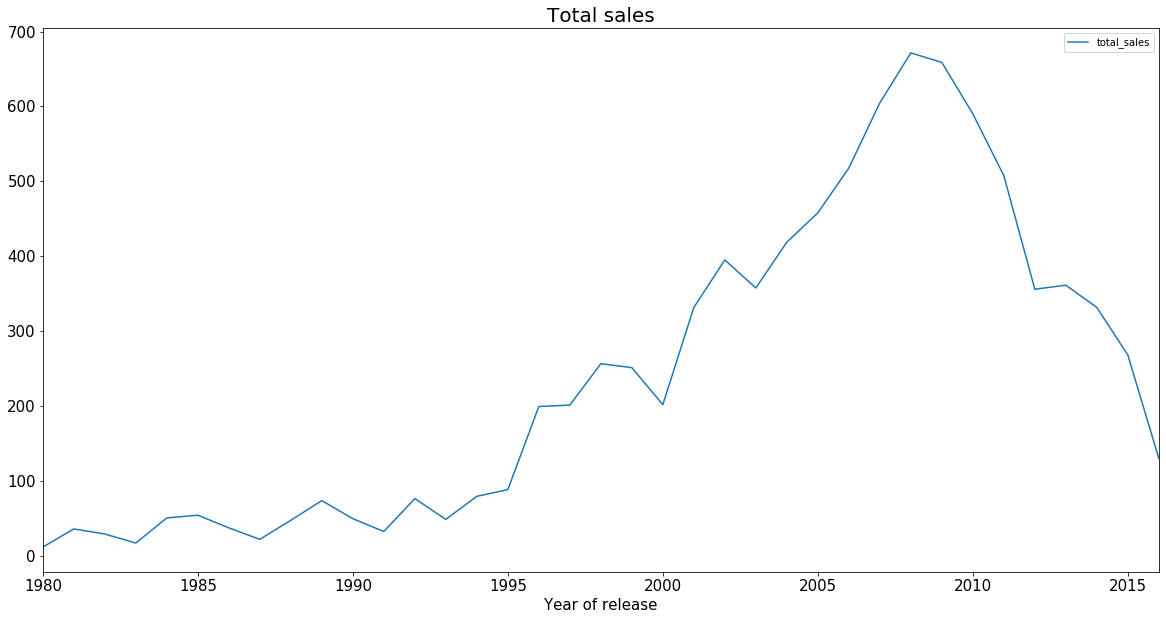

In [18]:
games[games['year_of_release'] != 1900].groupby('year_of_release').agg({'total_sales':'sum'})\
.plot(legend=True, figsize=(20, 10), title='Total sales', fontsize=15).title.set_size(20)

plt.xlabel('Year of release',fontsize=15)
plt.show()

Актуальный период с 2014 по 2016

### <a name="Describe_distributions"></a> Какие платформы лидируют по продажам, растут или падают?

Наиболее прибыльные платформы всегда будут актуальные платформы.  
Одно поколение плятформы живет от 4 до 6 лет.  
У PS3 отличные продажи и выглядит перспективно, но это было перспективно 2007  
В 2017 году необходимо ставки делать на актуальные платформы - это PS4, XOne, PC  
Падает WiiU так, как был анонс Switch, так же стоить обратить внимание на будущую консоль  
На 3DS игры попрежнему релизятся и стабильно продаются, но консоль обусловлена регионом, срок поколения выходит (консоль на рынке около 6 лет) и делать на нее ставку не стал бы. Опять же анонс Switch был, лучше ставку на него сделать

### <a name="Boxplot"></a> Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0.5, 0, 'Platform')

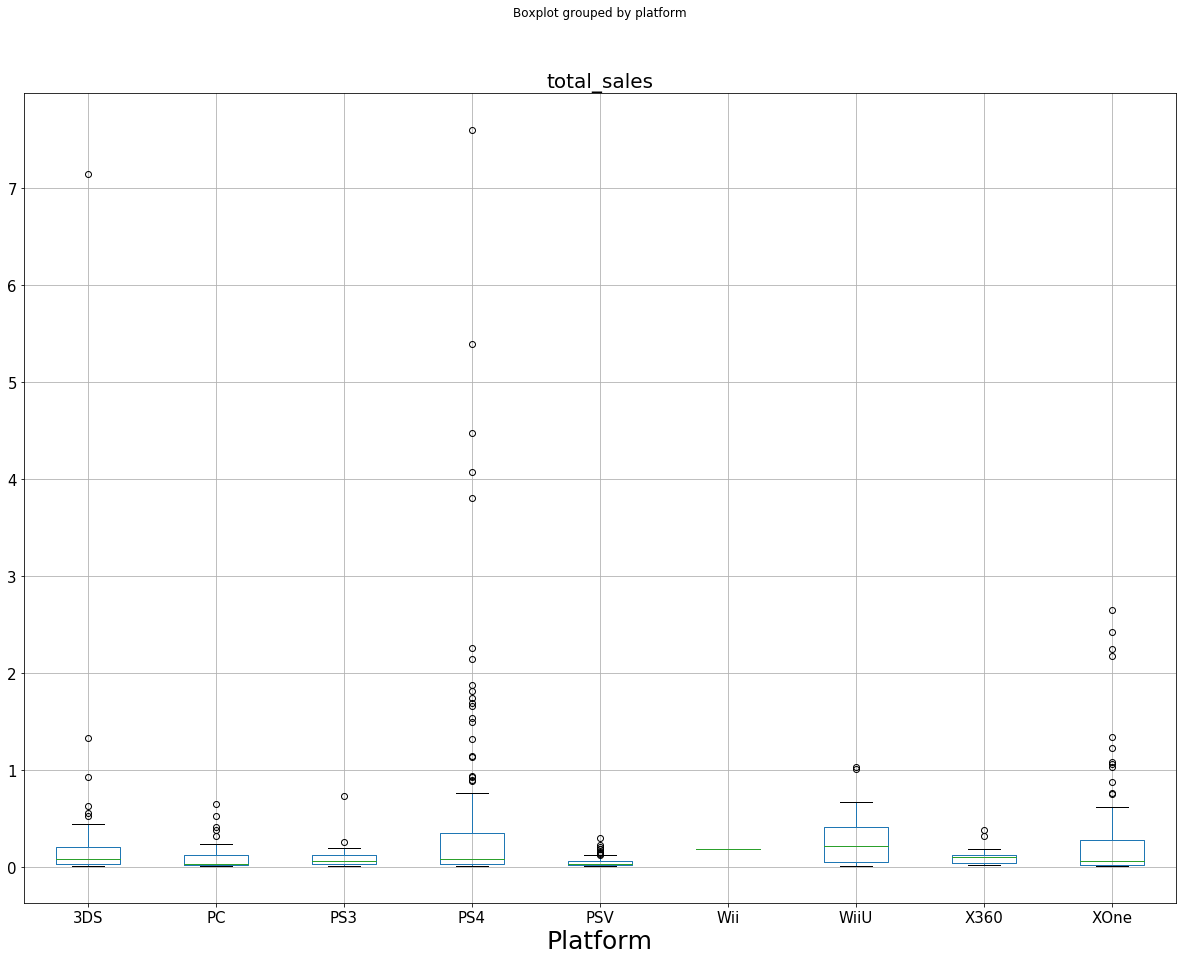

In [19]:
games_2016 = games[games['year_of_release'] == 2016]

games_2016.boxplot('total_sales', 'platform', figsize=(20, 15), fontsize=15).title.set_size(20)
plt.xlabel('Platform',fontsize=25)

### <a name="Impact_sales"></a> Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

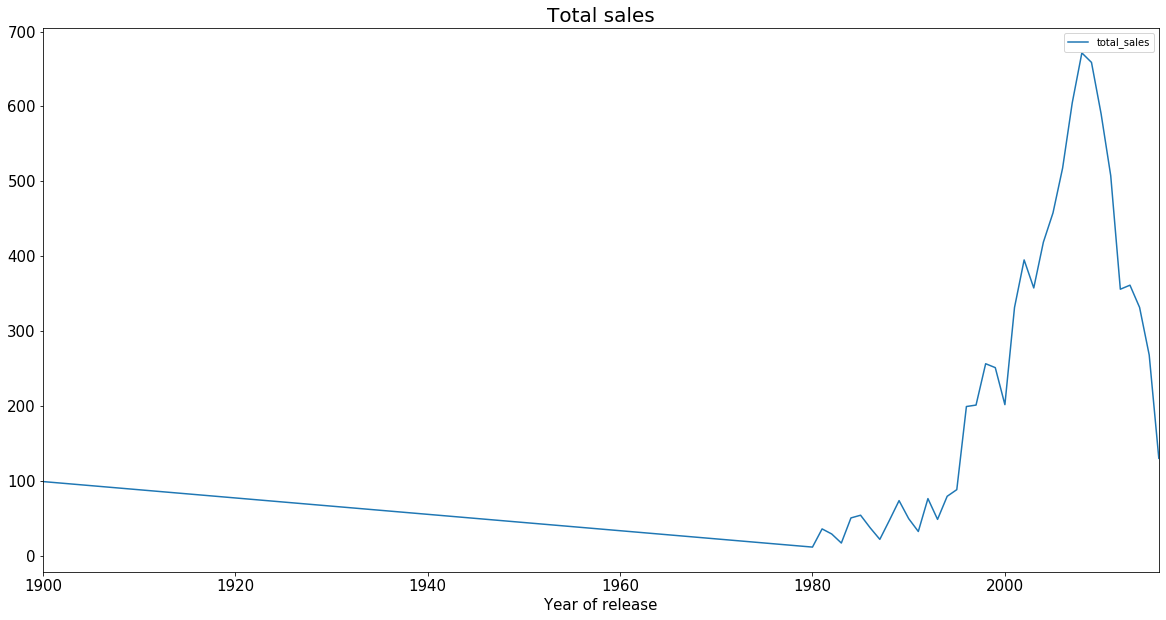

In [20]:
games.groupby('year_of_release')['total_sales'].sum()\
.plot(legend=True, figsize=(20, 10), title='Total sales', fontsize=15).title.set_size(20)

plt.xlabel('Year of release',fontsize=15)
plt.show()

,user_score,critic_score,total_sales
year_of_release,,,
2013,5.46,70.93,25.07
2014,6.74,73.13,80.95
2015,6.86,72.21,80.90
2016,6.86,71.71,57.35


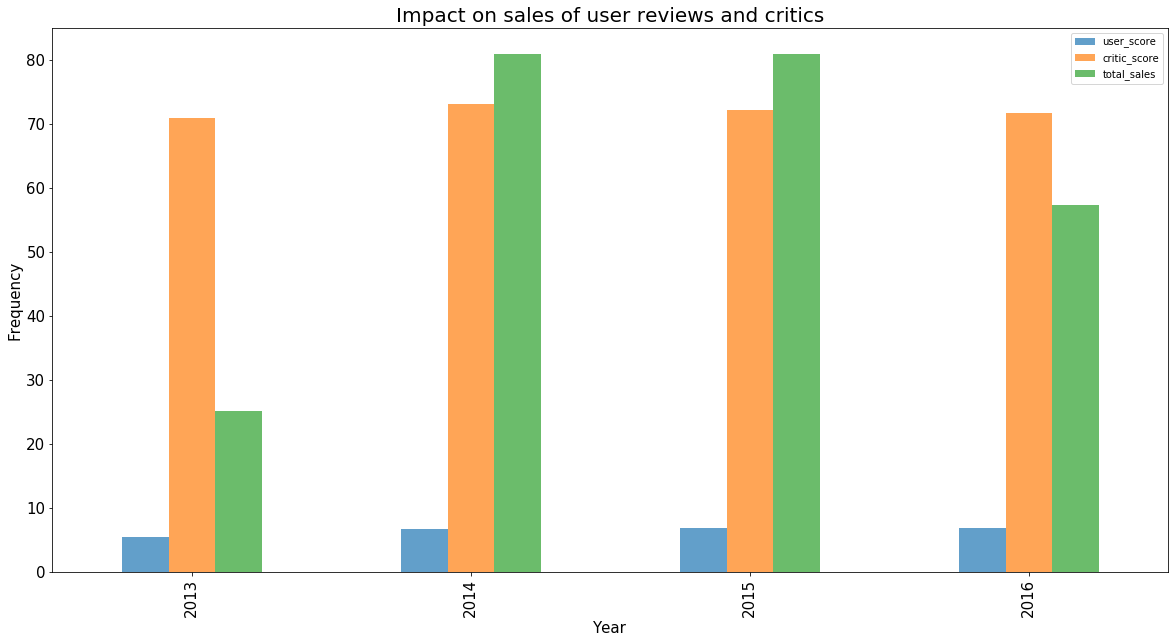

In [21]:
games_score_PS4 = games[(games['critic_score'] != -1) & (games['user_score'] != -1)\
                        & (games['year_of_release'] != 1900) & (games['platform'] == 'PS4') &\
      (games['user_score'].notna())].groupby('year_of_release').agg({'user_score':'mean', 'critic_score':'mean',
                                                                     'total_sales':'sum'})

display(games_score_PS4)
games_score_PS4.plot(kind='bar', legend=True, figsize=(20, 10), title='Impact on sales of user reviews and critics', fontsize=15,\
                 alpha=0.7).title.set_size(20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

In [22]:
corr_user_score_sales = games_score_PS4[['user_score', 'total_sales']].corr().style.format('{:.2%}')
corr_critic_score_sales = games_score_PS4[['critic_score', 'total_sales']].corr().style.format('{:.2%}')
display(corr_user_score_sales)
display(corr_critic_score_sales)

,user_score,total_sales
user_score,100.00%,88.73%
total_sales,88.73%,100.00%


,critic_score,total_sales
critic_score,100.00%,90.42%
total_sales,90.42%,100.00%


Корреляция между отзывами и продажами высокая.  
Отзовы влияют на продажи игр

### <a name="Correlate_conclusions"></a> Соотнести выводы с продажами игр на других платформах

,user_score,critic_score,total_sales
year_of_release,,,
1985,5.80,59.00,0.04
1988,2.20,64.00,0.03
1992,8.20,85.00,0.02
1994,6.30,69.00,1.26
1996,8.40,89.88,20.35
1997,8.54,86.14,36.05
1998,8.51,81.54,45.27
1999,8.47,81.40,51.13
2000,7.54,72.18,81.30


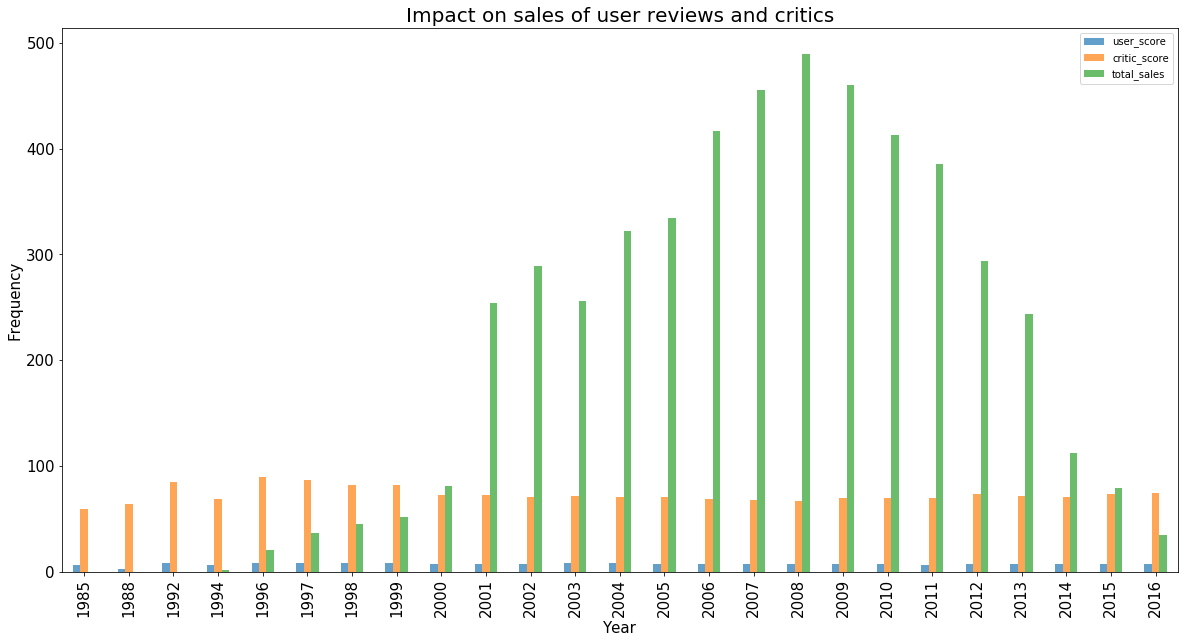

In [23]:
games_score_other = games[(games['critic_score'] != -1) & (games['user_score'] != -1)\
                          & (games['year_of_release'] != 1900) & (games['platform'] != 'PS4') &\
      (games['user_score'].notna())].groupby('year_of_release').agg({'user_score':'mean', 'critic_score':'mean',
                                                                     'total_sales':'sum'})

display(games_score_other)
games_score_other.plot(kind='bar', legend=True, figsize=(20, 10), title='Impact on sales of user reviews and critics', fontsize=15,\
                 alpha=0.7).title.set_size(20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

In [24]:
corr_user_score_sales = games_score_other[['user_score', 'total_sales']].corr().style.format('{:.2%}')
corr_critic_score_sales = games_score_other[['critic_score', 'total_sales']].corr().style.format('{:.2%}')
display(corr_user_score_sales)
display(corr_critic_score_sales)

,user_score,total_sales
user_score,100.00%,7.23%
total_sales,7.23%,100.00%


,critic_score,total_sales
critic_score,100.00%,-41.56%
total_sales,-41.56%,100.00%


Между отзывами игроков и продажами корреляция очень слабая, в то время как между отзывами критиков и продажами средняя

### <a name="General_distribution"></a> Общее распределение игр по жанрам.

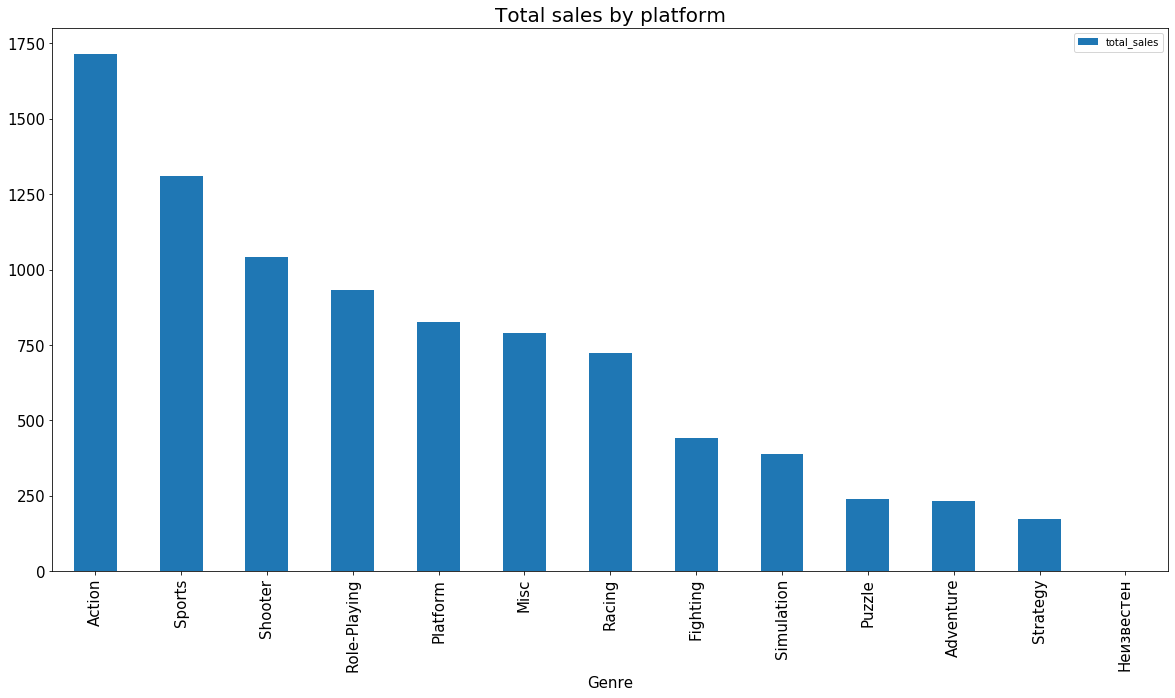

In [25]:
games[games['year_of_release'] != 1900].groupby('genre').agg({'total_sales':'sum'})\
.sort_values('total_sales', ascending=False)\
.plot(kind='bar', legend=True, figsize=(20, 10), title='Total sales by platform', fontsize=15)\
.title.set_size(20)

plt.xlabel('Genre',fontsize=15)
plt.show()

Наиболее прибыльные жанры это Экшены, Спрот, и Шутеры - все эти жанры скилозависимые  
Наименее прибыльные жанры это Пазлы, Адвенчуры и стратегии - данные жанры интересны в основном игроки, которые любят подумать, как тактически, так и логически, но это не значит, что игроки популярных жанров не думают

[К оглавлению](#Back)

## <a name="Portrait"></a> Составить портрет пользователя каждого региона
### <a name="Region"></a> Определить для пользователя каждого региона (NA, EU, JP):

#### <a name="Popular_platforms"></a> Самые популярные платформы (топ-5)

None


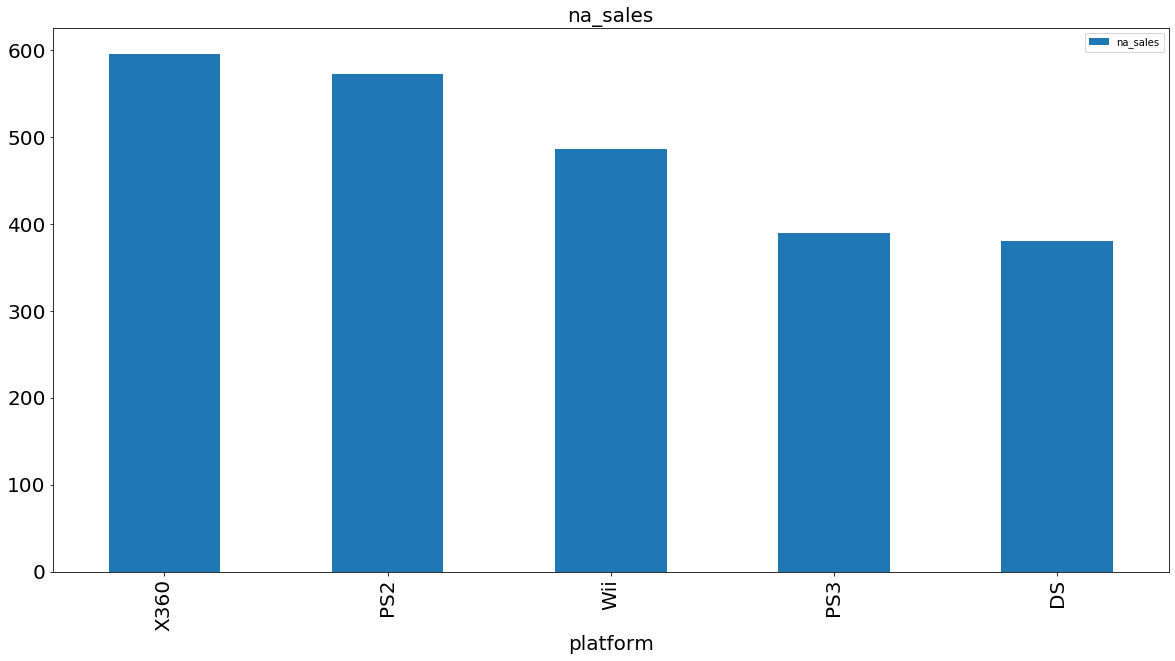

None


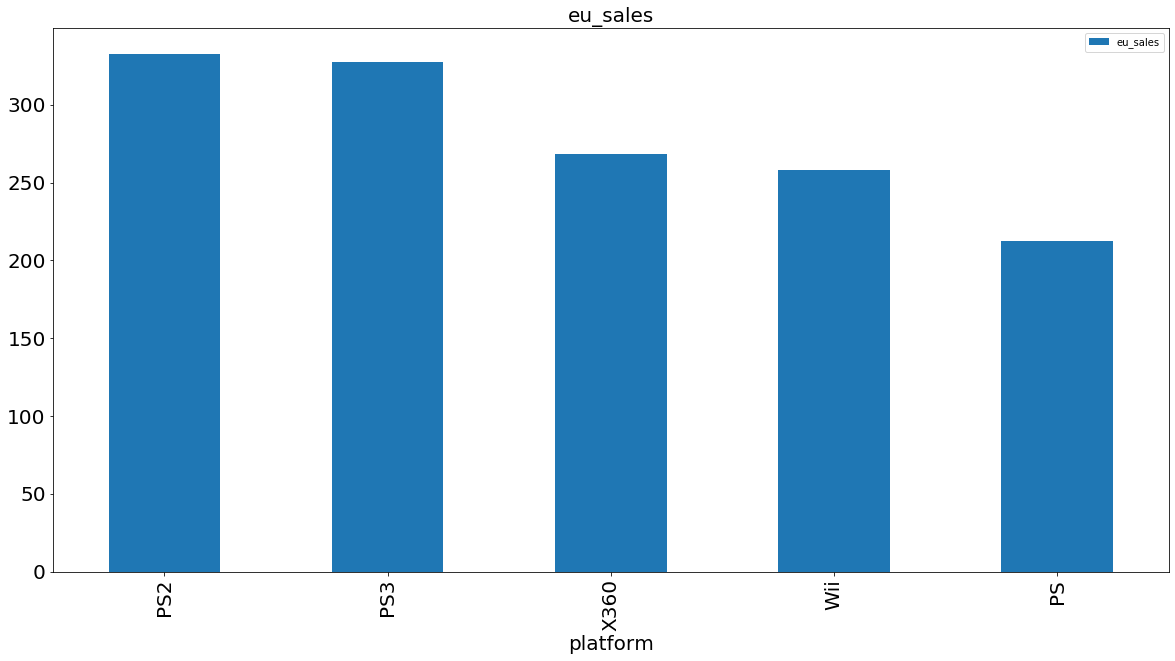

None


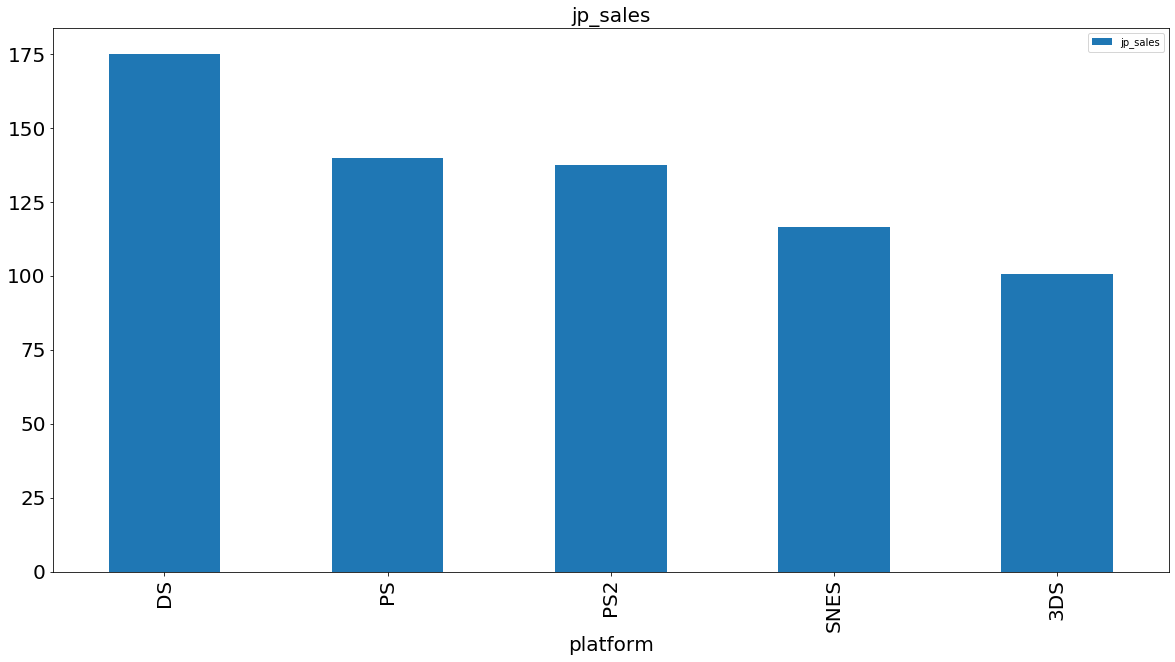

None


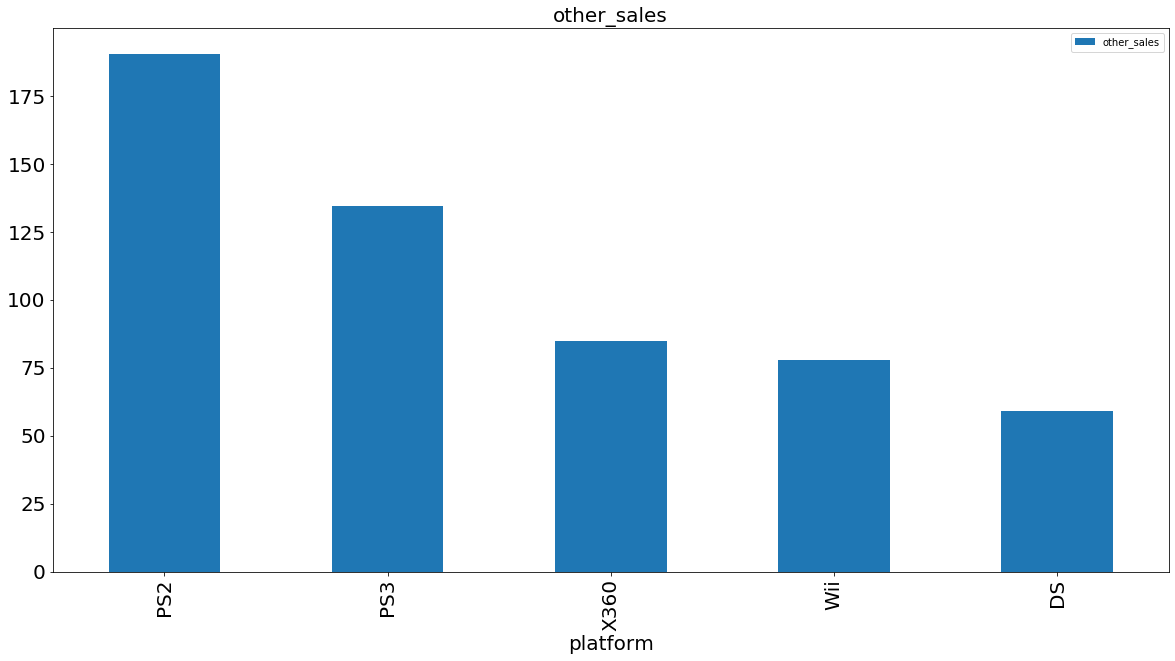

None


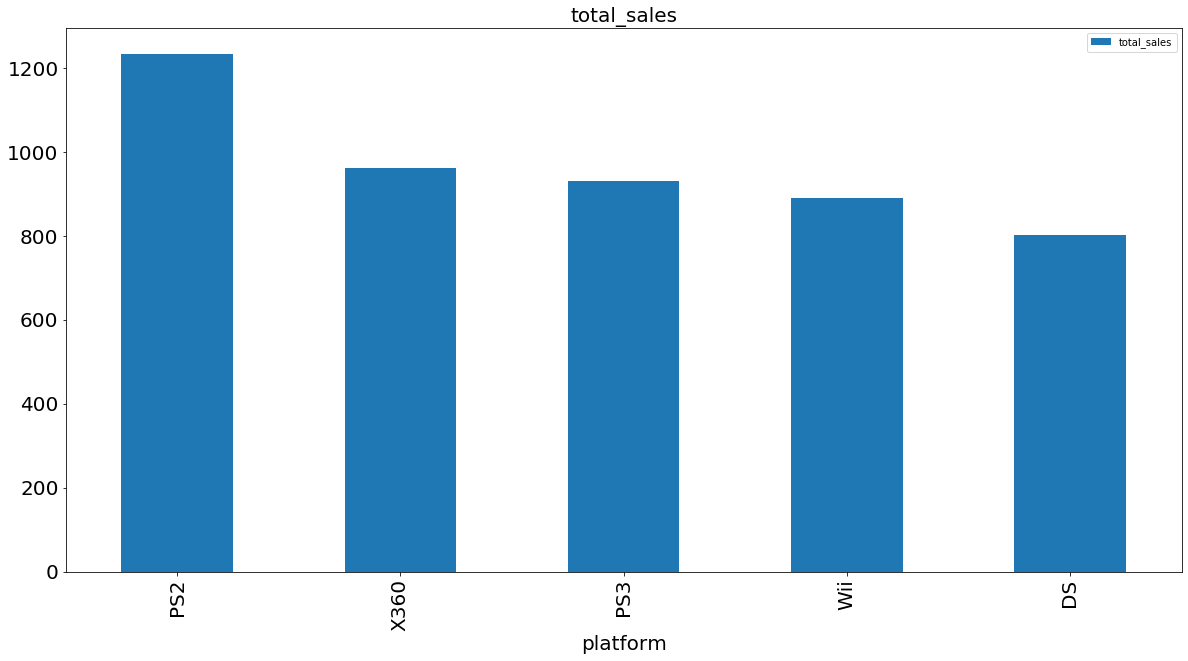

In [26]:
def top_five(data, col):
    for column in list(data):
        if 'sales' in column:
            print(data[data['year_of_release'] != 1900].groupby(col).agg({column:'sum'})\
                  .sort_values(column, ascending=False).head()\
                  .plot(title=column, kind='bar', legend=True, figsize=(20, 10), fontsize=20).title.set_size(20))
            plt.xlabel(col,fontsize=20)
            plt.show()

top_five(games, 'platform')

В NA Xbox и PS одинаково популярны  (NA страна производитель Xbox)  
В UE в основном популярна PS  
В JP популярны портативные консоли и PS (jp страна производитель PS)  
В Other популярны PS

#### <a name="Popular_genres"></a> Самые популярные жанры (топ-5)

None


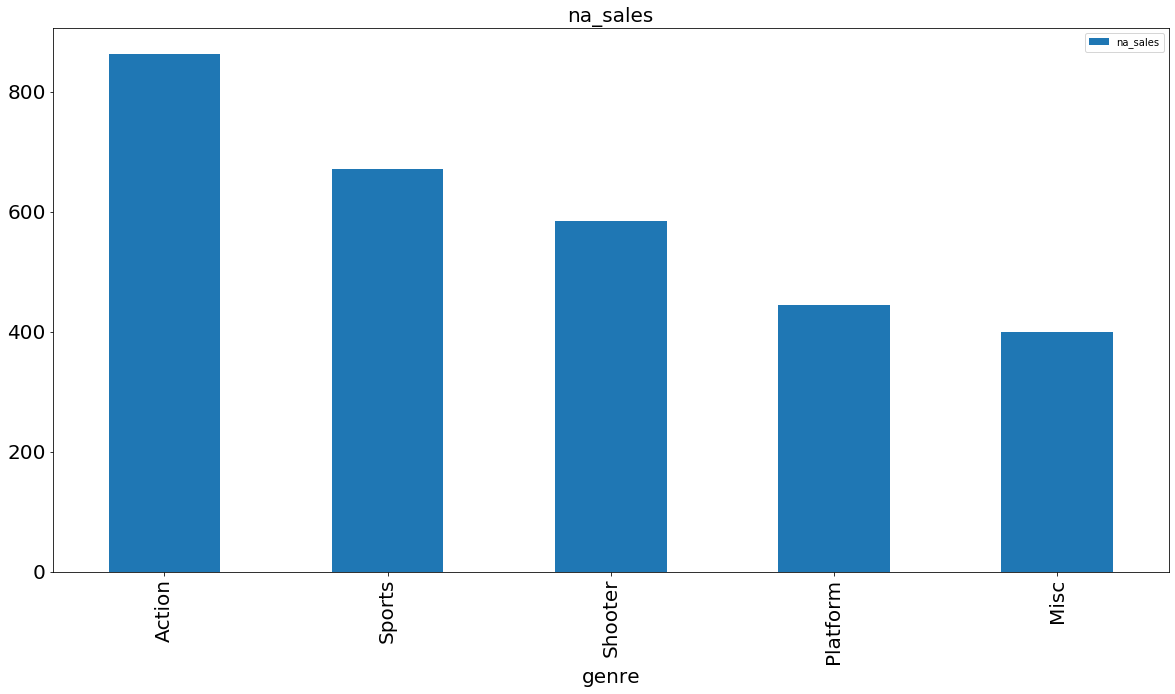

None


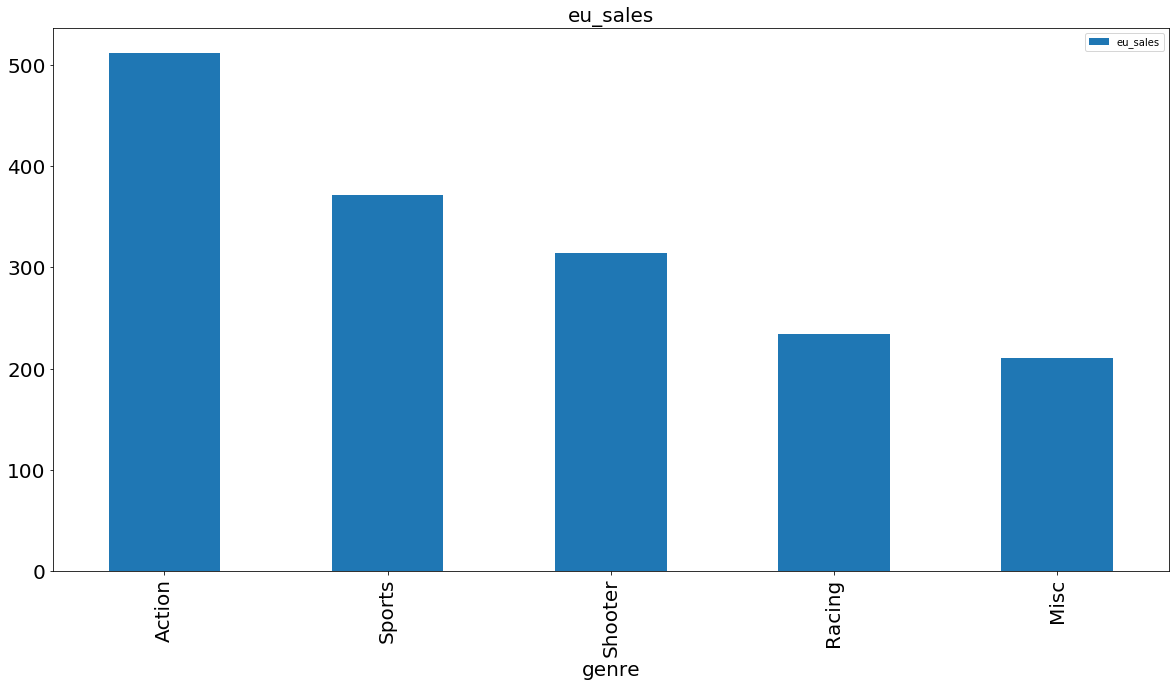

None


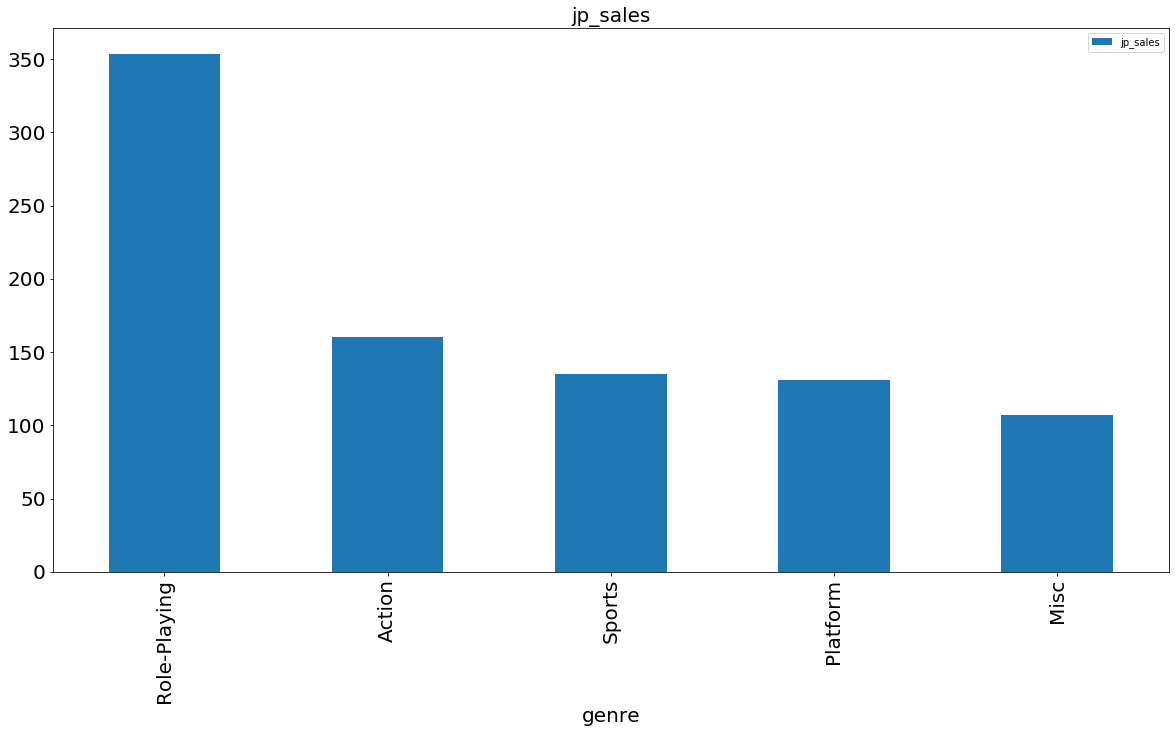

None


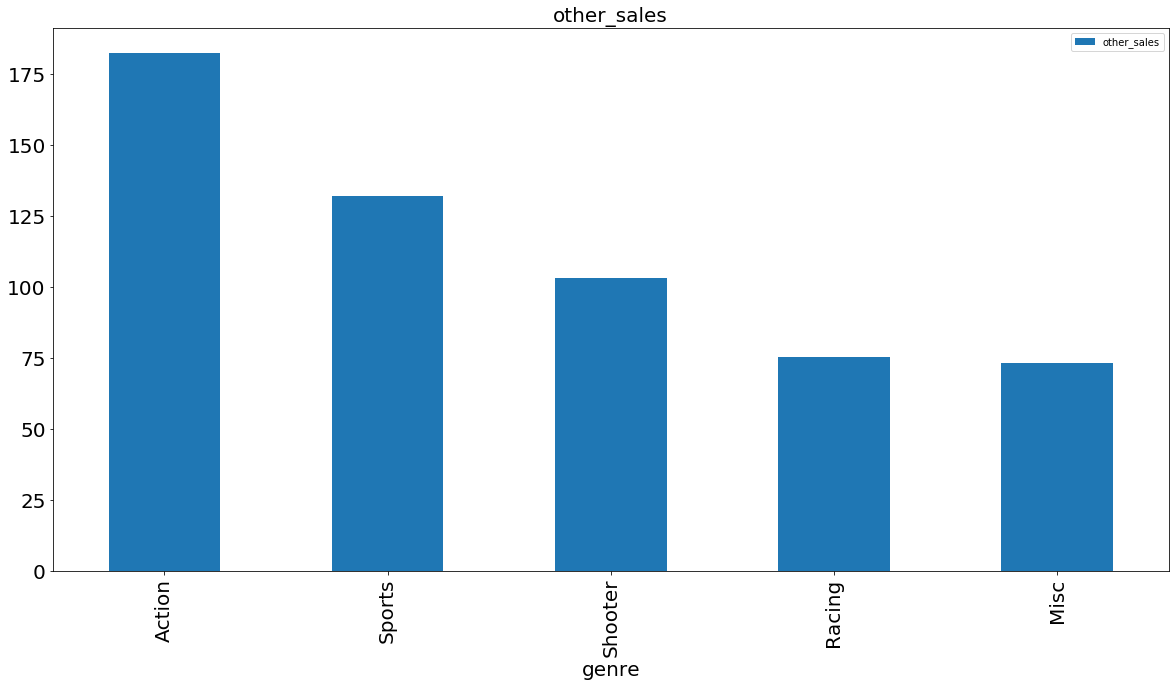

None


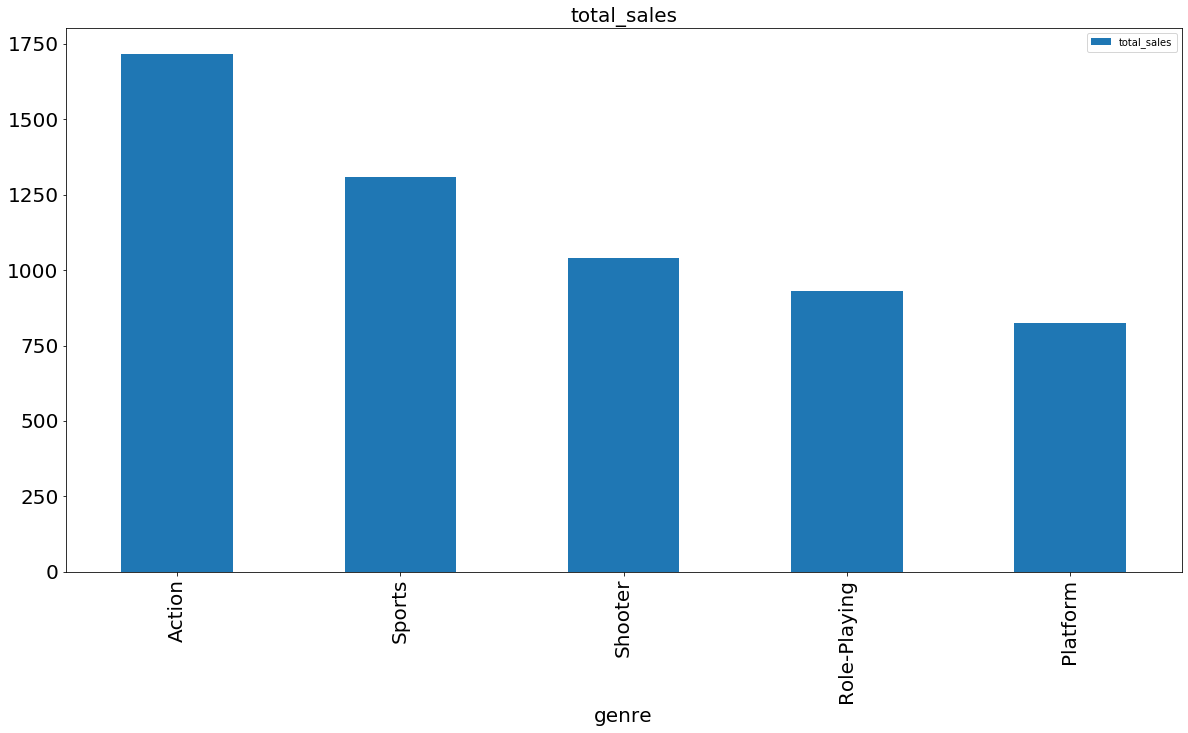

In [27]:
top_five(games, 'genre')

Все любят экшены и спорт, а Японцы любят ролевые игры (никогда не забуду Final Fantasy)

#### <a name="User_revenue"></a> Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [28]:
games_filter = games[games['year_of_release'] != 1900]
# добавим описание рейтинга
def rating_description(row):
    if row['rating'] == 'AO':
        return 'Только для взрослых'
    elif row['rating'] == 'E':
        return 'Для всех'
    elif row['rating'] == 'E10+':
        return 'Для всех старше 10 лет'
    elif row['rating'] == 'EC':
        return 'Для детей младшего возраста'
    elif row['rating'] == 'K-A':
        return 'Для всех'
    elif row['rating'] == 'M':
        return 'От 17 лет'
    elif row['rating'] == 'RP':
        return 'Рейтинг ожидается'
    elif row['rating'] == 'T':
        return 'Подросткам 13—19 лет'
    return 'Отсутствует'

games_filter['rating_description'] = games_filter.apply(rating_description, axis=1)
games_filter.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_description
2322,The Biggest Loser: Ultimate Workout,X360,2010,Sports,0.73,0.10,0.00,0.06,68.00,-1.00,E,0.89,Для всех
1833,Crackdown 2,X360,2010,Shooter,0.63,0.36,0.02,0.10,70.00,6.00,M,1.11,От 17 лет
16378,Slide Adventure: Mag Kid,DS,2007,Action,0.00,0.00,0.01,0.00,-1.00,-1.00,Неизвестен,0.01,Отсутствует
1207,Command & Conquer: Tiberian Sun,PC,1999,Strategy,1.55,0.00,0.00,0.00,-1.00,-1.00,Неизвестен,1.55,Отсутствует
5950,Fisherman's Bait 2: Big Ol' Bass,PS,1999,Sports,0.16,0.11,0.00,0.02,-1.00,-1.00,Неизвестен,0.29,Отсутствует
12819,Mighty Beanz: Pocket Puzzles,GBA,2004,Puzzle,0.04,0.01,0.00,0.00,37.00,-1.00,E,0.05,Для всех
16422,Jam Sessions: Sing and Play Guitar (jp sales),DS,2007,Misc,0.00,0.00,0.01,0.00,-1.00,-1.00,Неизвестен,0.01,Отсутствует
6037,Sonic Boom: Shattered Crystal,3DS,2014,Action,0.17,0.09,0.00,0.03,47.00,6.30,E,0.29,Для всех
5836,Dai-2-Ji Super Robot Taisen OG,PS3,2012,Strategy,0.00,0.00,0.30,0.00,-1.00,-1.00,Неизвестен,0.30,Отсутствует
13194,Guild 01,3DS,2012,Action,0.00,0.00,0.05,0.00,-1.00,-1.00,Неизвестен,0.05,Отсутствует


None


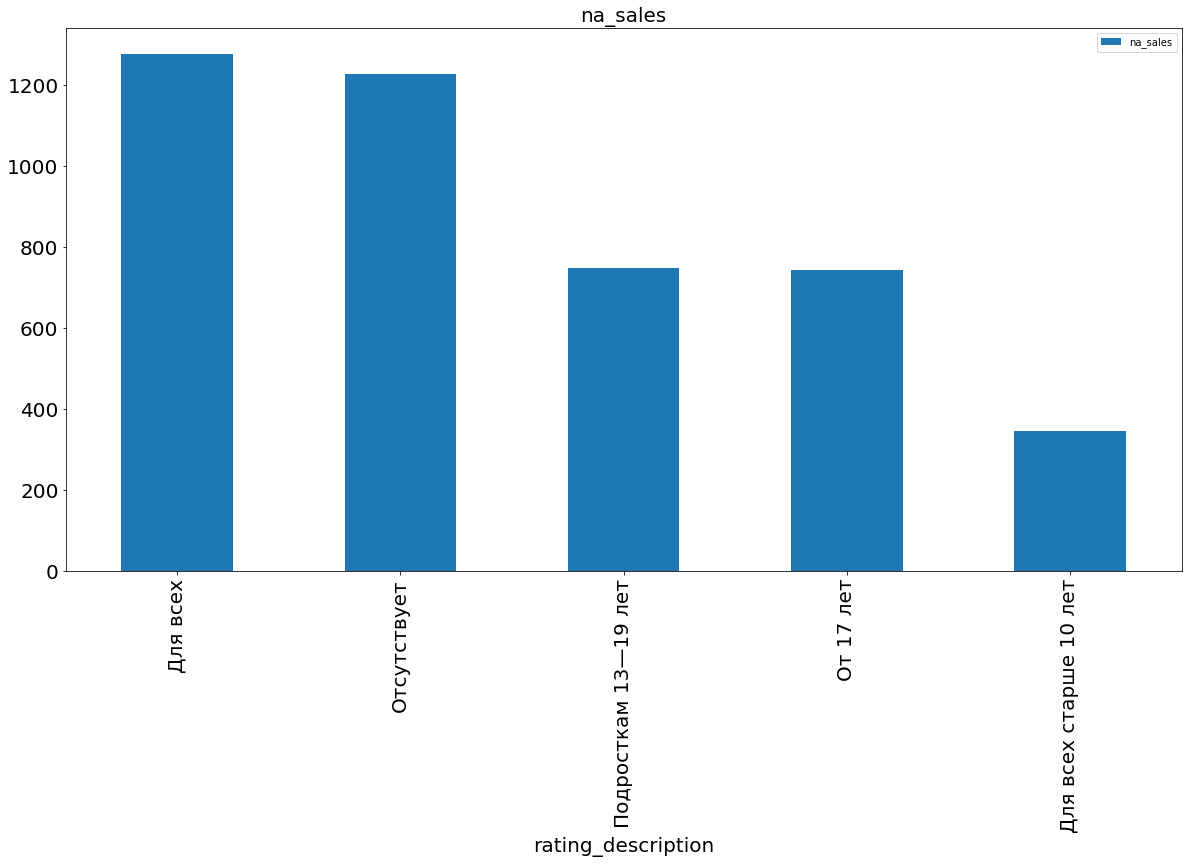

None


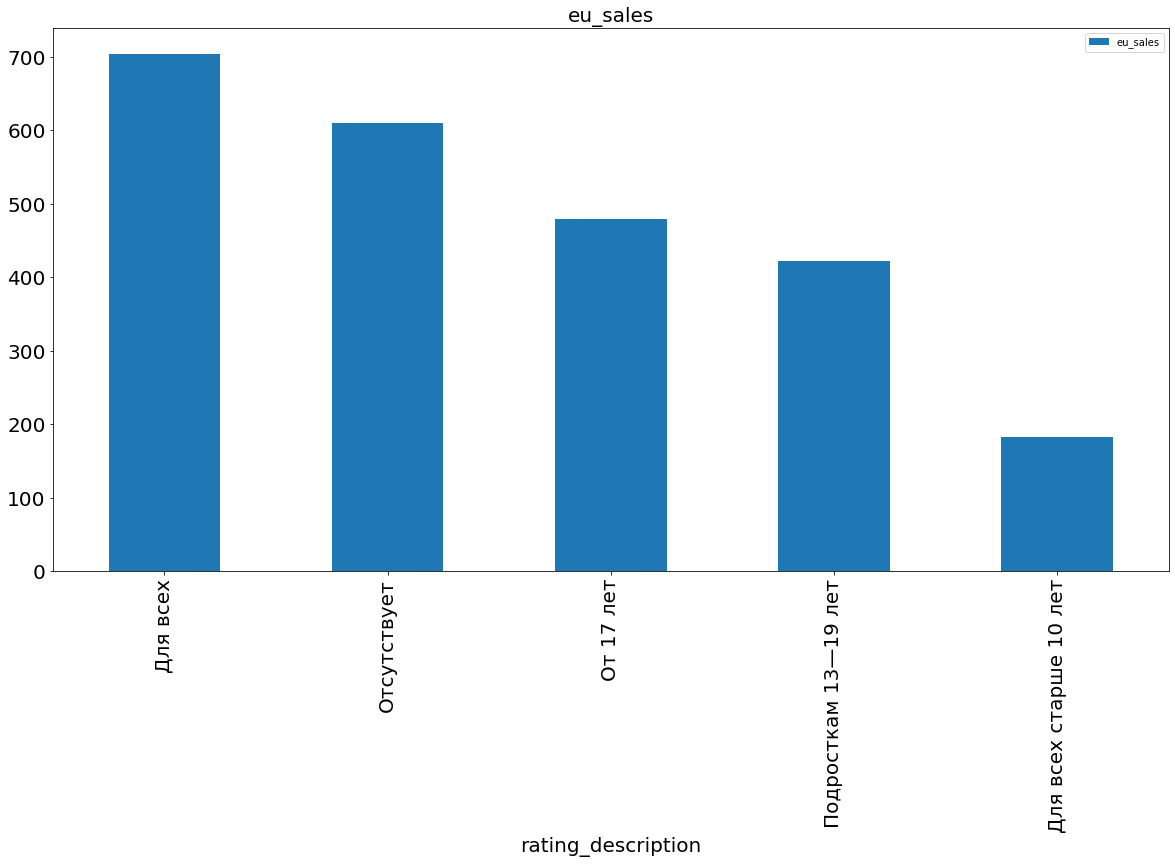

None


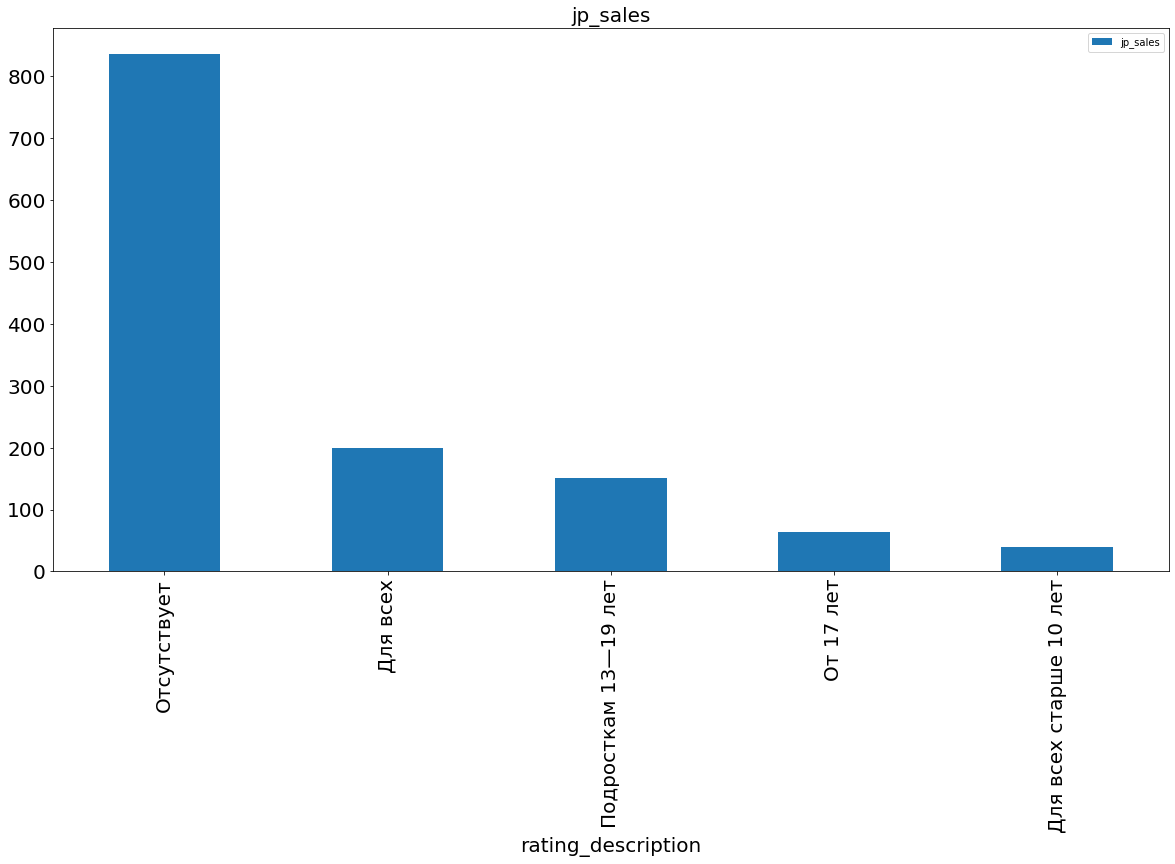

None


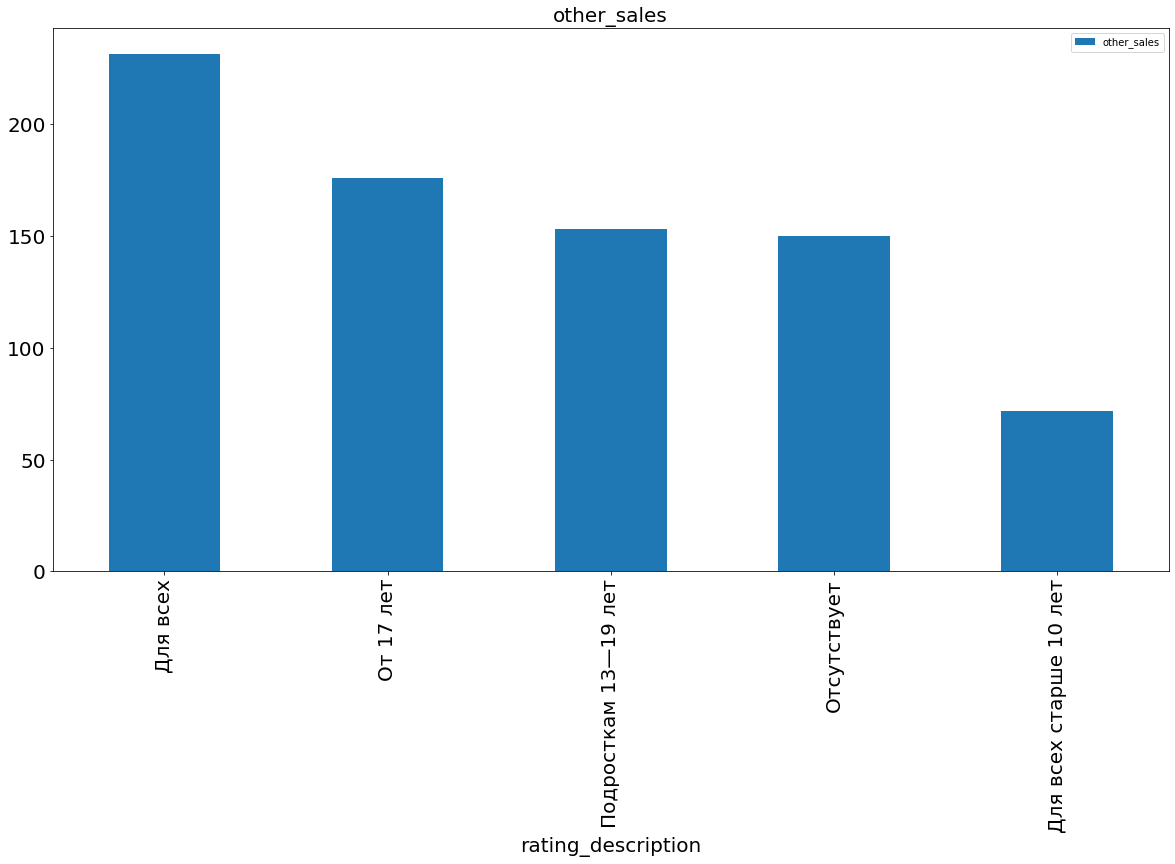

None


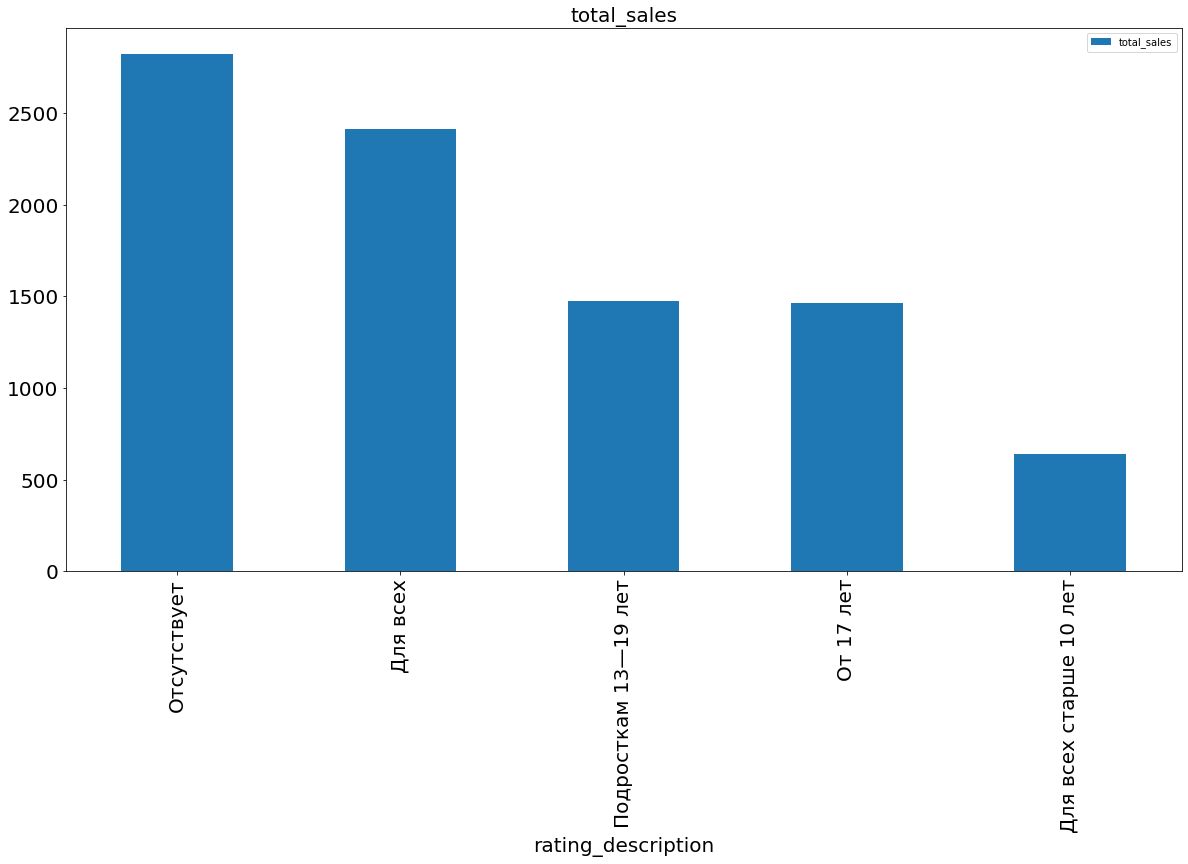

In [29]:
top_five(games_filter, 'rating_description')

In [30]:
rating_sales = games_filter.groupby('rating_description').agg({'rating':'count', 'total_sales':'sum'})
display(rating_sales)
corr_rating_sales = games_filter[['rating', 'total_sales']].corr().style.format('{:.2%}')
display(corr_rating_sales)

,rating,total_sales
rating_description,,
Для всех,3924,"2,411.93"
Для всех старше 10 лет,1393,640.98
Для детей младшего возраста,8,1.75
От 17 лет,1536,"1,462.53"
Отсутствует,6678,"2,824.52"
Подросткам 13—19 лет,2905,"1,473.08"
Рейтинг ожидается,1,0.04
Только для взрослых,1,1.96


,total_sales
total_sales,100.00%


Как и ожидалось больше всего дохода приносят игры с рейтингом Для всех в любом регионе так, как у данного рейтинга наиболее широкий охват аудитории  
Так же наиболее популярные рейтинги Подросткам 13—19 лет и От 17 лет  
Только в других регионах рейтинги Подросткам 13—19 лет и От 17 лет поменялись местами, но они везде почти равны  
Рейтинг на прямую влияет на продажи игры, в любом из регионов, это подтверждается так же высокой корреляцией.

[К оглавлению](#Back)

## <a name="Hypothesis"></a> Проверить гипотезы
### <a name="Hypothesis1"></a> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Гипотезы:
* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [31]:
alpha = .05

In [32]:
XOne = games_filter[(games_filter['user_score'] != -1) & (games_filter['platform'] == 'XOne')\
                    & (games_filter['user_score'].notna())]['user_score']
PC = games_filter[(games_filter['user_score'] != -1) & (games_filter['platform'] == 'PC')\
                  & (games_filter['user_score'].notna())]['user_score']

In [33]:
variance_XOne = np.var(XOne, ddof=1)
variance_PC = np.var(PC, ddof=1)

print(variance_XOne)
print(variance_PC)

1.9069968429360695
2.349224375076853


In [34]:
results = st.ttest_ind(
    XOne, 
    PC, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC различаются

### <a name="Hypothesis2"></a> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

#### Гипотезы:
* H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
* H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [35]:
action = games_filter[(games_filter['user_score'] != -1) & (games_filter['genre'] == 'Action')\
                      & (games_filter['user_score'].notna())]['user_score']
sports = games_filter[(games_filter['user_score'] != -1) & (games_filter['genre'] == 'Sports')\
                      & (games_filter['user_score'].notna())]['user_score']

In [36]:
variance_Action = np.var(action, ddof=1)
variance_Sports = np.var(sports, ddof=1)

print(variance_Action)
print(variance_Sports)

2.027493768262496
2.623055812519272


In [37]:
results = st.ttest_ind(
    action, 
    sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

[К оглавлению](#Back)

## <a name="Results"></a> Результаты
### <a name="Conclusion"></a> Вывод

1. Не смотря на то, что количество игр стало меньше в сравнении с 2008-2010 года, в дальнейшем с развитием технологий количество игр станет больше так, как их делать станет проще (нейросети, движки и иные инструменты)
2. В экшены и спортивные игры, как играли так и будут играть.
3. Ролевые игры тяжелы в производстве и в целом сделать интересный геймплей, сюжет и т.д. довольно сложно, поэтому мы не скоро увидим в топах ролевые игры (хороших единицы)
4. Рейтинг Для всех всегда будет в топе по продажам (если что то радикально не поменяется в обществе)
5. Ожидаемо, что рейтинги пользователей ПК и Xbox различаются, два разных комьюнити
6. Интересно, что мнение критиков ценится выше и они могут, как поднять продажи игры, так и опустить их на дно, в тоже время оценки пользователей не важны, но врамках одной платформы, влияние пользователей не уступает влиянию критиков
7. Оцнки жанрам Экшен и Спорт почти одинаковы и это нормально так, как это самые популярные жанры игр

### <a name="Recommendations"></a> Рекомендации

1. При выгрузке Дат необходимо проверить тип данных (выгружается float)
2. При выгрузке хотелось бы видеть полную дату релиза так, как игры имеют сезонность (летом продаются хуже, чем осенью). При наличии месяца было бы интересно так же посмотреть какие игры в какие месяцы выходили, кто осмеливался выходить в один месяц с крупными ААА-играми, какая финансовая судьба их ожидала (были ли исключения, когда касса неизвестной игры была выше, чем у ААА проекта) и т.д.
3. Проверить, как выгружается наименование игр (страно, что в данной колонке, есть NaN), и как выгружается рейтинг игр, врятли есть игры без рейтинга (исключения только игры без релиза, но тоже спорный вариант)